In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
'''
For sklearn:

The sklearn example took 25242233.276367188 cycles.
K-means found clusters [[10.  2.]
 [ 1.  2.]].
The 4-D data took 22531223.29711914 cycles.
K-means found clusters [[4.4        3.90561    6.6        5.01      ]
 [0.86666667 1.16666667 0.76666667 0.8       ]].
'''

'''
For the base C implementation:

Testing unoptimized k-means. Note that since k-means initializes clusters randomly, it might return incorrect clusters sometimes.
Basic test on the sklearn toy dataset:
	The centroids should be (10,2) and (1,2).
	The first centroid is (1.000000,2.000000).
	The second centroid is (10.000000,2.000000).
Basic test completed.
Cycles taken total on the sklearn example: 291510.333333
4-D test:
	The centroids should be around (1,1,1,1) and (5,5,5,5).
	The first centroid is (0.866667,1.166667,0.766667,0.800000).
	The second centroid is (4.400000,3.905610,6.600000,5.010000).
4D test completed.
Cycles taken total on the 4D example: 261700.833333
...tests done.
'''

'\nFor the base C implementation:\n\nTesting unoptimized k-means. Note that since k-means initializes clusters randomly, it might return incorrect clusters sometimes.\nBasic test on the sklearn toy dataset:\n\tThe centroids should be (10,2) and (1,2).\n\tThe first centroid is (1.000000,2.000000).\n\tThe second centroid is (10.000000,2.000000).\nBasic test completed.\nCycles taken total on the sklearn example: 291510.333333\n4-D test:\n\tThe centroids should be around (1,1,1,1) and (5,5,5,5).\n\tThe first centroid is (0.866667,1.166667,0.766667,0.800000).\n\tThe second centroid is (4.400000,3.905610,6.600000,5.010000).\n4D test completed.\nCycles taken total on the 4D example: 261700.833333\n...tests done.\n'

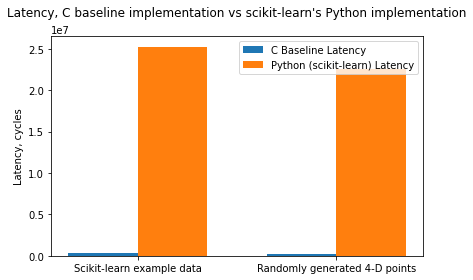

In [3]:
# Plot the performance of sklearn compared to the C base implementation.
python_times = [25242233.276367188, 22531223.29711914]
c_times = [291510.333333, 261700.833333]

ind = np.arange(len(python_times)) 
width = 0.35       
plt.xticks(ind + width / 2, ('Scikit-learn example data', 'Randomly generated 4-D points'))

plt.bar(ind, c_times, width, label='C Baseline Latency')
plt.bar(ind + width, python_times, width,
    label='Python (scikit-learn) Latency')

plt.ylabel("Latency, cycles")
plt.legend(loc='best')
plt.title("Latency, C baseline implementation vs scikit-learn's Python implementation", pad=20)

plt.tight_layout()

In [4]:
'''
For the base C implementation kernel timing: 

Average cycles taken total on kernel 3a: 122.547333
Average cycles taken total on kernel 3b: 40.358000
Average cycles taken total on kernel 4a: 86.875667
Average cycles taken total on kernel 4b: 36.419667
Throughput in kernel 3a: 0.391685
Throughput in kernel 3b: 0.314962
Throughput in kernel 4a: 0.138128
Throughput in kernel 4b: 0.109831
'''

'''
Theoretical peaks:

3a: 24
3b: 8
4a: 4
4b: 1/2
'''

'\nTheoretical peaks:\n\n3a: 24\n3b: 8\n4a: 4\n4b: 1/2\n'

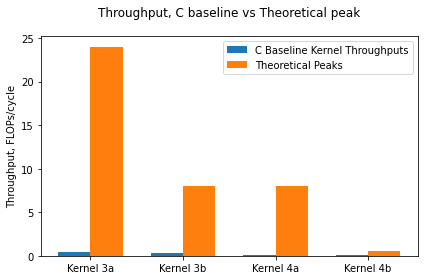

In [5]:
# Plot the performance of each section of the base C code to the theoretical peak.
theoretical_peaks = [24, 8, 8, 0.5]
throughputs = [0.391685, 0.314962, 0.138128, 0.109831]

ind = np.arange(len(theoretical_peaks)) 
width = 0.35       
plt.xticks(ind + width / 2, ('Kernel 3a', 'Kernel 3b', 'Kernel 4a', 'Kernel 4b'))

plt.bar(ind, throughputs, width, label='C Baseline Kernel Throughputs')
plt.bar(ind + width, theoretical_peaks, width,
    label='Theoretical Peaks')

plt.ylabel("Throughput, FLOPs/cycle")
plt.legend(loc='best')
plt.title("Throughput, C baseline vs Theoretical peak", pad=20)

plt.tight_layout()

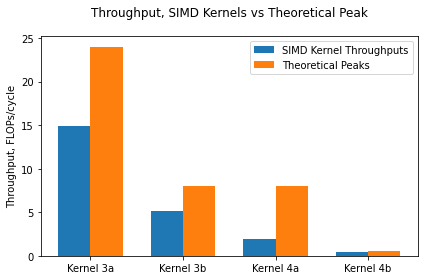

In [6]:
# Plot the performance of each section of the SIMD kernels to the theoretical peak.
theoretical_peaks = [24, 8, 8, 0.5]
throughputs = [14.88, 5.13, 1.98, 0.44]

ind = np.arange(len(theoretical_peaks)) 
width = 0.35       
plt.xticks(ind + width / 2, ('Kernel 3a', 'Kernel 3b', 'Kernel 4a', 'Kernel 4b'))

plt.bar(ind, throughputs, width, label='SIMD Kernel Throughputs')
plt.bar(ind + width, theoretical_peaks, width,
    label='Theoretical Peaks')

plt.ylabel("Throughput, FLOPs/cycle")
plt.legend(loc='best')
plt.title("Throughput, SIMD Kernels vs Theoretical Peak", pad=20)

plt.tight_layout()

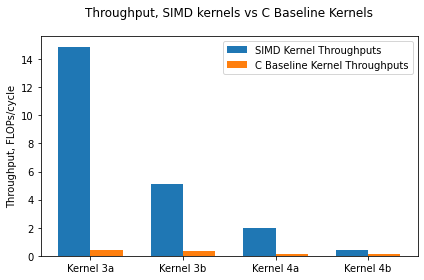

In [7]:
# Plot the performance of each section of the SIMD kernels to the baseline.
baseline_throughputs = [0.391685, 0.314962, 0.138128, 0.109831]
simd_throughputs = [14.88, 5.13, 1.98, 0.44]

ind = np.arange(len(theoretical_peaks)) 
width = 0.35       
plt.xticks(ind + width / 2, ('Kernel 3a', 'Kernel 3b', 'Kernel 4a', 'Kernel 4b'))

plt.bar(ind, simd_throughputs, width, label='SIMD Kernel Throughputs')
plt.bar(ind + width, baseline_throughputs, width,
    label='C Baseline Kernel Throughputs')

plt.ylabel("Throughput, FLOPs/cycle")
plt.legend(loc='best')
plt.title("Throughput, SIMD kernels vs C Baseline Kernels", pad=20)

plt.tight_layout()

Text(0.5, 1.0, 'Comparison of Log(Latency) Across K-Means Implementations')

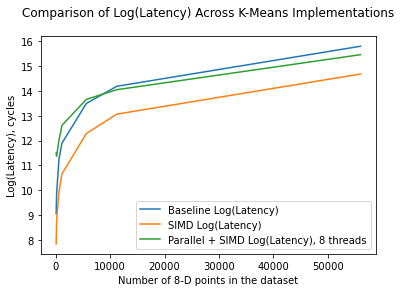

In [8]:
num_points = [56, 128, 560, 1120, 5600, 11200, 56000]
baseline = [8551.773500, 18371.394250, 75525.531667, 146456.892667, 724276.704000, 1445925.525333, 7246748.032000]
simd = [2532.277500, 6110.481417, 20537.660333, 42494.588333, 216151.124000, 470966.776000, 2370149.973333]
parallel = [98286.316000, 86775.049333, 162309.290667, 299700.752000, 853046.490667, 1259552.576000, 5161371.541333]

baseline = [np.log(x) for x in baseline]
simd = [np.log(x) for x in simd]
parallel = [np.log(x) for x in parallel]

plt.plot(num_points, baseline, label='Baseline Log(Latency)')
plt.plot(num_points, simd, label='SIMD Log(Latency)')
plt.plot(num_points, parallel, label='Parallel + SIMD Log(Latency), 8 threads')

plt.xlabel('Number of 8-D points in the dataset')
plt.ylabel('Log(Latency), cycles')
plt.legend(loc='best')
plt.title('Comparison of Log(Latency) Across K-Means Implementations', pad=20)

Text(0.5, 1.0, 'Comparison of Log(Latency) Across K-Means Implementations')

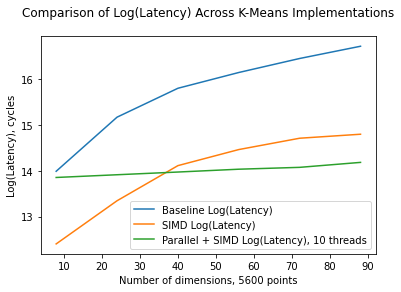

In [9]:
num_dims = [8, 24, 40, 56, 72, 88]
baseline = [1192378.549333, 3891253.397333, 7319382.912000, 10332598.186667, 14036285.098667, 18342789.290667]
simd = [243660.365333, 625934.650667, 1349234.874667, 1916939.040000, 2455629.600000, 2680052.629333]
parallel = [1041266.592000, 1105272.453333, 1172821.296000, 1247580.677333, 1299315.44000, 1448119.114667]

baseline = [np.log(x) for x in baseline]
simd = [np.log(x) for x in simd]
parallel = [np.log(x) for x in parallel]

plt.plot(num_dims, baseline, label='Baseline Log(Latency)')
plt.plot(num_dims, simd, label='SIMD Log(Latency)')
plt.plot(num_dims, parallel, label='Parallel + SIMD Log(Latency), 10 threads')

plt.xlabel('Number of dimensions, 5600 points')
plt.ylabel('Log(Latency), cycles')
plt.legend(loc='best')
plt.title('Comparison of Log(Latency) Across K-Means Implementations', pad=20)